In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Customer_churn_processed.csv")

# **STEP 1 — Feature Importance (Exploratory)**

**(1) Train a basic Random Forest (default params)**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [6]:

# Assuming 'Churn' is the target variable and other columns are features
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**(2) Extract feature importance**

In [8]:
# This gets the score for every colum
importances = rf.feature_importances_
feature_names = X_train.columns

# create a Dataframe to organize them
feat_importances = pd.Series(importances, index=feature_names)

**(3) Plot Top 15 features**

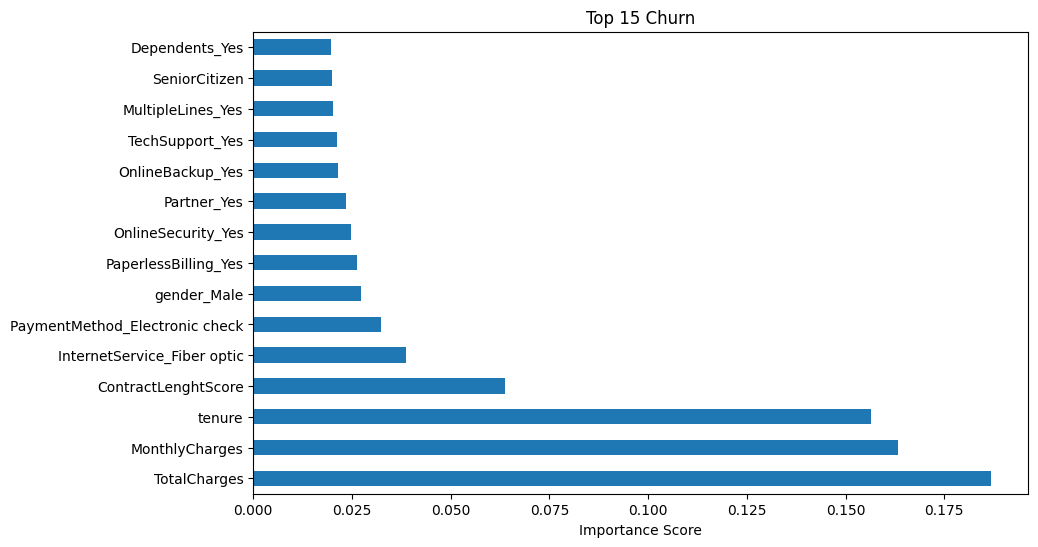

In [11]:
plt.figure(figsize=(10,6))
# nlargest(15) picks the top 15 highest scores
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Churn")
plt.xlabel("Importance Score")
plt.show()

# **STEP 2 — Multicollinearity Check**

**(1) Compute correlation matrix (numeric features)**

In [12]:
# We look at tenure , MonthlyCharges and TotalCharges
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = X_train[numeric_features].corr()

**(2) Identify highly correlated pairs (|corr| > 0.8)**

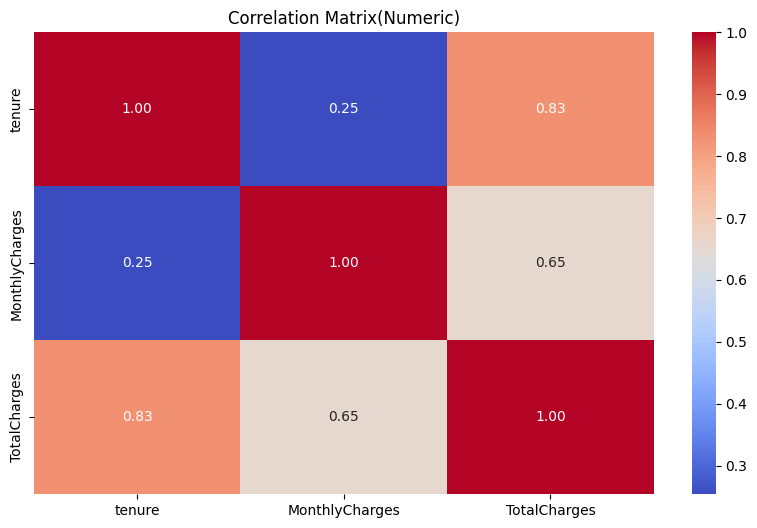

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix(Numeric)")
plt.show()

I observed heatmap the both  'tenure' and 'TotalCharges' are crossing the  > 0.8 (correalation)

**(3) Decide:  Keep one and Drop one**

**Keep one :** I decided 'tenure' to keep in the dataset

**Drop one :** I decided 'TotalCharges' to drop in dataset

**Why i drop the 'TotalCharges' ?**

- > The reason of why i drop the 'TotalCharges' because is i have 'tenure' and 'MonthlyCharges' with this columns i can get the 'TotalChagres'.

- > It effctes the speed of model also and it is not a important columns in dataset that why i drop the 'TotalCharges'.

In [14]:
# Drop the Totalchagres
X_train = X_train.drop(columns=['TotalCharges'], errors='ignore')
X_test = X_test.drop(columns=['TotalCharges'], errors='ignore')

print("Dropped 'TotalCharges' due to high correlation")

Dropped 'TotalCharges' due to high correlation


# **STEP 3 — Feature Selection**

**Drop:**

**- >Low-importance featuresHighly**

**- >correlated redundant features**




In [16]:
# --- STEP 3: Feature Selection (Finalizing Data) ---

# Manam already drop chesam, kani "X_final" create cheyali kabatti idi run cheddam.
# errors='ignore' unte... column already lekapoyina parledu, error radu.
X_train_final = X_train.drop(columns=['TotalCharges'], errors='ignore')
X_test_final = X_test.drop(columns=['TotalCharges'], errors='ignore')

# Target (y) same untundi
y_train_final = y_train
y_test_final = y_test

print("Step 3 Done! Final Data Shape:", X_train_final.shape)

Step 3 Done! Final Data Shape: (5634, 31)


**STEP 4 — Baseline Models**

**Train two simple models:** Logistic Regression & Random Forest

**Evaluate using:** Accuracy , Precision , Recall , F1-score

⚠️ Focus on Recall for Churn = Yes.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [20]:
# 1. Logistic Regression
print("\n--- Model 1: Logistic Regression --- ")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_final, y_train_final)
y_pred_lr = lr_model.predict(X_test_final)

# Report print
print(classification_report(y_test_final, y_pred_lr))




--- Model 1: Logistic Regression --- 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# 2. Random Forest
print("\n--- Model 2: Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train_final)
y_pred_rf = rf_model.predict(X_test_final)

# Report print
print(classification_report(y_test_final, y_pred_rf))



--- Model 2: Random Forest ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



**STEP 5 — Save Artifacts**

**(1) Save:**  Final feature list & Baseline model metrics table

In [26]:
# This saves the names of the columns used in training (X_train_final)
feature_list = (X_train_final.columns)
feature_df = pd.DataFrame(feature_list, columns=['Feature_Name'])

In [28]:
# save to csv
feature_df.to_csv('final_feature_list.csv', index=False)

In [29]:
print("-- Final Feature list Saved(First 5)---")
print(feature_df.head())


-- Final Feature list Saved(First 5)---
            Feature_Name
0          SeniorCitizen
1                 tenure
2         MonthlyCharges
3  HighMonthlyChargeFlag
4    ContractLenghtScore


**(2) Save Baseline Model Metrics Today**

In [30]:
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.81, 0.79],          # From your output
    'Precision (No Churn)': [0.86, 0.83], # Class 0 Precision
    'Recall (Churn=Yes)': [0.58, 0.47]    # Class 1 Recall (The most important one!)
}

metrics_df = pd.DataFrame(metrics_data)

print("\n--- Baseline Model Metrics Table ---")
print(metrics_df)

# Save to CSV (Optional)
metrics_df.to_csv('baseline_model_metrics.csv', index=False)


--- Baseline Model Metrics Table ---
                 Model  Accuracy  Precision (No Churn)  Recall (Churn=Yes)
0  Logistic Regression      0.81                  0.86                0.58
1        Random Forest      0.79                  0.83                0.47
